# Proyecto Final ML23

In [17]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import os

# **Parametros**

* `interacion:`       **int**   #Episodios
* `learning_rate:`    **float** #Learning rate
* `gamma:`            **float** #Discount rate
* `epsilon:`          **float** # Exploration probability
* `seed:`             **int**   # Define a seed so that we get reproducible results
* `n_runs:`           **int**   # Number of runs
* `action_size:`      **int**   # Number of possible actions
* `state_size:`       **int**   # Number of possible states
* `proba_frozen:`     **float** # Probability that a tile is frozen
 


In [18]:
#El hugo y sus parametros ://////
iteracion = 100 #episodios
learning_rate = 0.3
intentos = 200 #numero de intentos
discount_rate = 0.3 #gamma
exploration_chance = 0.7 #epsilon
semilla = 56738
mininum_chance = 0.001
decreasing_decay = 0.01
rewards_per_iteracion = list()
env = gym.make('FrozenLake-v1', desc=None, render_mode="human" ,map_name="4x4", is_slippery=False) #ambiente

In [19]:
class Qlearning:
    def _init_(self, learning_rate, gamma, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.reset_qtable()
    
    def update(self, state, action, reward, new_state):
        #Update Q(s,a) = Q(s,a) + Lr[ R(s,a) + gamma * maxQ(s',a') - Q(s,a)]
        delta = (
            reward
            + self.gamma *np.max(self.qtable[new_state, :])
            - self.qtable[state, action]
        )
        q_update = self.qtable[state, action] + self.learning_rate * delta
        return q_update
    
    def reset_qtable(self):
        #Resets Q-Table
        self.qtable=np.zeros((self.state_size,self.action_size))

class EpsilonGreedy:
    def _init_(self, epsilon):
        self.epsilon = epsilon

    def choose_action(self, action_space, state, qtable):
        "Escoger una accion 'a' en el contexto actual (s)"
        #Randomiza un numero
        explore_exploit_tradeoff = rng.uniform(0,1)

        #Exploracion
        if(explore_exploit_tradeoff<self.epsilon):
            action = action_space.sample()
        
        #Explotacion (tomar el Q-valor mas grande para este estado)
        else:
            if np.all(qtable[state, :]) == qtable [state, 0]:
                action = action_space.sample()
            else:
                action = np.argmax(qtable[state,:])
        return action



In [14]:
from gym.envs.toy_text.frozen_lake import generate_random_map #Utilizar esto para generar mapas y evaluar al agente entrenado


def run():

    state = env.reset()[0] #Estados 0 al 15, 0=top left, 15=bottom left 
    hoyo = False
    analisis = env.observation_space
    interacion = 0

    while(not hoyo):
        action = env.action_space.sample() #acciones 0=izq,1=abajo,2=der,3=arriba
        info = env.step(action)
        new_state,reward,hoyo,_,_= info
    
        state = new_state
        interacion = interacion + 1
        
        print("Interaccion numero: "+ str(interacion)+" hizo la accion numero: "+str(action))
        print(info)
        env.render()
        time.sleep(3)
        
    env.close()
    
    print(analisis)
run() #corre el Frozen Lake

Interaccion numero: 1 hizo la accion numero: 0
(0, 0.0, False, False, {'prob': 1.0})
Interaccion numero: 2 hizo la accion numero: 3
(0, 0.0, False, False, {'prob': 1.0})
Interaccion numero: 3 hizo la accion numero: 0
(0, 0.0, False, False, {'prob': 1.0})
Interaccion numero: 4 hizo la accion numero: 2
(1, 0.0, False, False, {'prob': 1.0})
Interaccion numero: 5 hizo la accion numero: 2
(2, 0.0, False, False, {'prob': 1.0})
Interaccion numero: 6 hizo la accion numero: 0
(1, 0.0, False, False, {'prob': 1.0})
Interaccion numero: 7 hizo la accion numero: 3
(1, 0.0, False, False, {'prob': 1.0})
Interaccion numero: 8 hizo la accion numero: 0
(0, 0.0, False, False, {'prob': 1.0})
Interaccion numero: 9 hizo la accion numero: 1
(4, 0.0, False, False, {'prob': 1.0})
Interaccion numero: 10 hizo la accion numero: 1
(8, 0.0, False, False, {'prob': 1.0})
Interaccion numero: 11 hizo la accion numero: 2
(9, 0.0, False, False, {'prob': 1.0})
Interaccion numero: 12 hizo la accion numero: 1
(13, 0.0, False

In [20]:
#Qtable Printout
qtable = np.zeros((16,4))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [21]:
def plot_episode_rewards(rewards, savefolder=None, savefilename='Recompensa.png'):
    plt.plot(rewards)
    plt.title('Episode Rewards Over Time')
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    if savefolder:
        savepath = os.path.join(savefolder,savefilename)
        plt.savefig(savepath)
        
    plt.show()

In [22]:
from gym.envs.toy_text.frozen_lake import generate_random_map #Utilizar esto para generar mapas y evaluar al agente entrenado
#metodo para entrenar al agente 
def training_waf(iteracion, intentos, exploration_chance, qtable, learning_rate, discount_rate, mininum_chance, decreasing_decay, rewards_per_iteracion):
    #Entrenamiento del agente imbezil
    #we iterate over episodes
    e=0
    total_episode_reward = 0
    
    for e in range(iteracion):
        #we initialize the first state of the episode
        
        current_state = env.reset()[0] #GRAAAAAAAAAAAAAAH X_x
        done = False
    
        #sum the rewards that the agent gets from the environment
        total_episode_reward = 0
    
        for i in range(intentos): 
            
            # we sample a float from a uniform distribution over 0 and 1
            # if the sampled flaot is less than the exploration proba
            #     the agent selects arandom action
            # else
            #     he exploits his knowledge using the bellman equation 
        
            if np.random.uniform(0,1) < exploration_chance:
                action = env.action_space.sample()
            else:
                action = np.argmax(qtable[current_state,:])
        
            # The environment runs the chosen action and returns
            # the next state, a reward and true if the epiosed is ended.
            info = env.step(action)
            next_state, reward, done, _, _ = info
        
            # We update our Q-table using the Q-learning iteration
            qtable[int(current_state), action] = (1-learning_rate) * qtable[int(current_state), action] +learning_rate*(reward + discount_rate*np.max(qtable[int(next_state),:]))
            total_episode_reward = total_episode_reward + reward
            # If the episode is finished, we leave the for loop
            if done:
                break
            print(f"iteracion: {e+1}")
            print(info)
            current_state = next_state
       
        print(info)
        env.render()
        
    
        #We update the exploration proba using exponential decay formula 
        exploration_chance = max(mininum_chance, np.exp(-decreasing_decay*e))
        rewards_per_iteracion.append(total_episode_reward)   
    env.close()
    


iteracion: 1
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 1
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 1
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 1
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 1
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 1
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 1
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 1
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 1
(1, 0.0, False, False, {'prob': 1.0})
(5, 0.0, True, False, {'prob': 1.0})
iteracion: 2
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 2
(1, 0.0, False, False, {'prob': 1.0})
(5, 0.0, True, False, {'prob': 1.0})
iteracion: 3
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 3
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 3
(1, 0.0, False, False, {'prob': 1.0})
iteracion: 3
(1, 0.0, False, False, {'prob': 1.0})
iteracion: 3
(2, 0.0, False, False, {'prob': 1.0})
iteracion: 3
(2, 0.0, False, False, {'prob': 1.0})
iteracion: 3
(2, 0.0, False, False, {'prob': 1.0})
iteracio

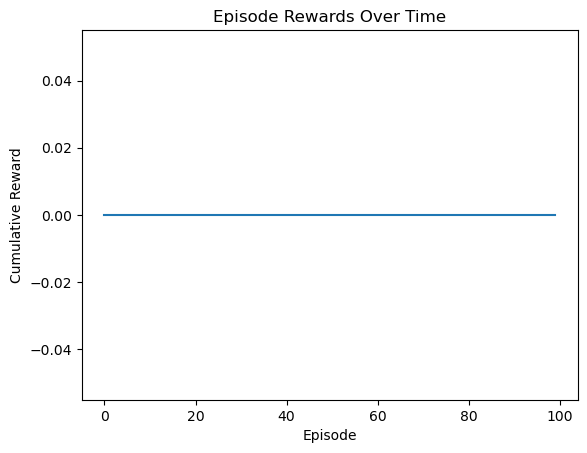

In [23]:
training_waf(iteracion, intentos, exploration_chance, qtable, learning_rate, discount_rate, mininum_chance, decreasing_decay, rewards_per_iteracion)
plot_episode_rewards(rewards_per_iteracion,savefolder="reward figures")